In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [52]:
data=pd.read_csv("Salary_Data.csv")

Checking for null values

In [53]:
print(data.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


In [54]:
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Removing duplicates....

In [55]:
print(data.size)

60


In [56]:
data.drop_duplicates(["YearsExperience","Salary"],inplace=True)

In [57]:
print(data.size)

60


Dividing dataset into dependent and independent data

In [58]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

Splitting the dataset into train,test,split

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [60]:
print(x_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [61]:
print(x_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [62]:
print(y_train)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]


In [63]:
print(y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431.]


Preparing simple linear Regression model...

In [64]:
from sklearn.linear_model import LinearRegression
n=LinearRegression()
n.fit(x_train,y_train)

LinearRegression()

Predicting the test data by using Regression model

In [65]:
y_pred=n.predict(x_test)

Comparing the original and predicted data.....

In [66]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[ 37731.          40748.96184072]
 [122391.         122699.62295594]
 [ 57081.          64961.65717022]
 [ 63218.          63099.14214487]
 [116969.         115249.56285456]
 [109431.         107799.50275317]]


Predicting random_data....

In [67]:
print(n.predict([[4.9]]))

[72411.7172716]


Visualizing the performance of model on test data...

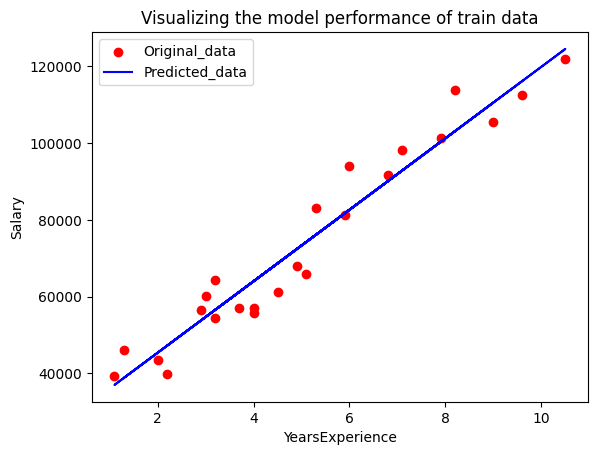

In [68]:
plt.scatter(x_train,y_train,color='red',label="Original_data")
plt.plot(x_train,n.predict(x_train),color='blue',label="Predicted_data")
plt.title("Visualizing the model performance of train data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

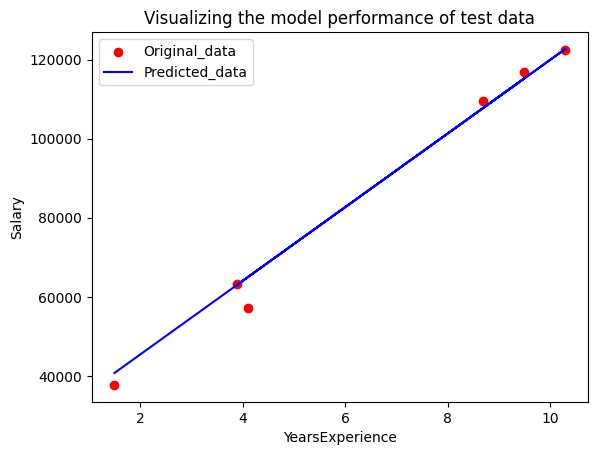

In [69]:
plt.scatter(x_test,y_test,color='red',label="Original_data")
plt.plot(x_test,n.predict(x_test),color='blue',label="Predicted_data")
plt.title("Visualizing the model performance of test data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import r2_score
print("Model accuracy : ",r2_score(y_test,y_pred))

Model accuracy :  0.988169515729126
